<a href="https://colab.research.google.com/github/muajnstu/Implementation-of-Active-Learning-Method-in-Regression-Model/blob/main/Relative_Performance_Index_score_for_Individual_Model_across_Multiple_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/Implementation-of-Active-Learning-Method-in-Regression-Model/refs/heads/main/updated_individual_model_results.csv")

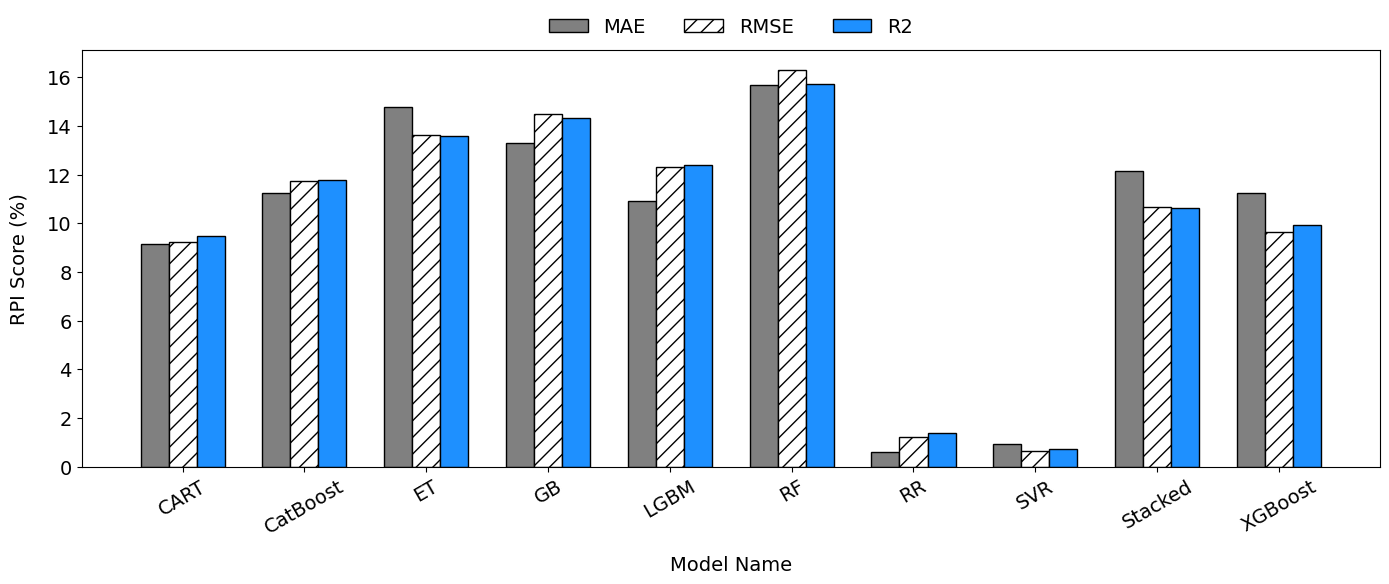

In [32]:
# RPI for each metric separately

def compute_rpi(df, metric, higher_better=True):
    rpi_values = []
    for (dataset, scaler), group in df.groupby(["Dataset", "Scaler"]):
        values = group[metric].values
        models = group["Model"].values

        if higher_better:
            a_star = values.min()
            denom = np.sum(values - a_star)
            scores = (values - a_star) / denom if denom != 0 else np.zeros_like(values)
        else:
            a_star = values.max()
            denom = np.sum(a_star - values)
            scores = (a_star - values) / denom if denom != 0 else np.zeros_like(values)

        for m, s in zip(models, scores):
            rpi_values.append({
                "Model": m, "Dataset": dataset, "Scaler": scaler,
                "Metric": metric, "RPI": s
            })
    return pd.DataFrame(rpi_values)

# RPI for all metrics
RPI_MAE = compute_rpi(df, "MAE", higher_better=False)
RPI_RMSE = compute_rpi(df, "RMSE", higher_better=False)
RPI_R2 = compute_rpi(df, "R2", higher_better=True)

rpi_all = pd.concat([RPI_MAE, RPI_RMSE, RPI_R2])

# Average RPI per Model & Metric
rpi_summary = rpi_all.groupby(["Model", "Metric"])["RPI"].mean().reset_index()
rpi_pivot = rpi_summary.pivot(index="Model", columns="Metric", values="RPI")


# Global RPI

global_rpi = rpi_summary.groupby("Model")["RPI"].mean().reset_index()
global_rpi = global_rpi.sort_values("RPI", ascending=False)


metrics = ["MAE", "RMSE", "R2"]
labels = ["MAE", "RMSE", "R2"]
colors = ["grey", "white", "dodgerblue"]
hatches = ["", "//", ""]

x = np.arange(len(rpi_summary["Model"].unique()))  # Model locations
bar_width = 0.23

fig, ax = plt.subplots(figsize=(14,6))

bars = []
for i, (metric, color, hatch, label) in enumerate(zip(metrics, colors, hatches, labels)):
    metric_data = rpi_summary[rpi_summary["Metric"] == metric].sort_values("Model") # Filter for the current metric and sort by Model
    bar = ax.bar(x + i*bar_width,
                 metric_data["RPI"]*100,
                 width=bar_width,
                 color=color,
                 label=label,
                 hatch=hatch,
                 edgecolor='k')
    bars.append(bar)

# Custom font sizes
fontsize_labels = 14
fontsize_ticks = 14
fontsize_legend = 14

ax.set_xticks(x + bar_width)
ax.set_xticklabels(rpi_summary["Model"].unique(), rotation=30, fontsize=fontsize_ticks) # Use unique model names for tick labels
ax.set_ylabel("RPI Score (%)", fontsize=fontsize_labels, labelpad=13)
ax.set_xlabel("Model Name", fontsize=fontsize_labels, labelpad=13)

# Custom legend to match hatches/colors
legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i], label=labels[i]) for i in range(len(labels))]
ax.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 1.12),ncol=len(labels), fontsize=fontsize_legend, frameon=False)
ax.tick_params(axis='y', labelsize=fontsize_ticks)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3996109790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=global_rpi, x="Model", y="RPI", palette="viridis")


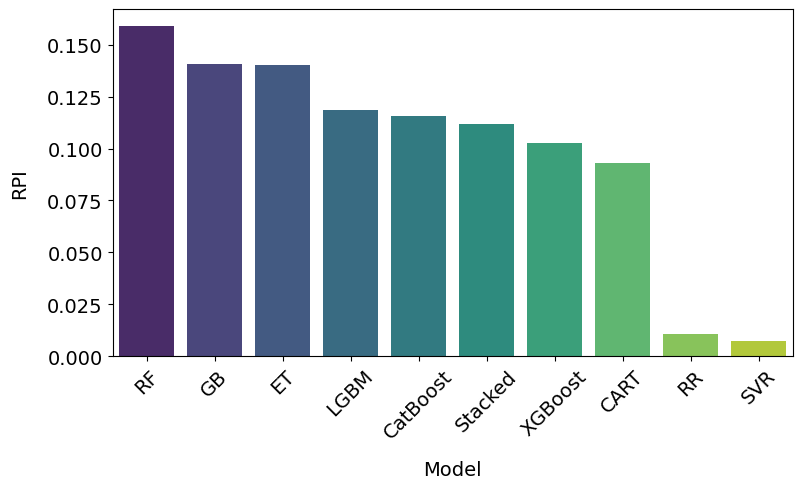

In [33]:
# Global RPI Bar Chart
plt.figure(figsize=(8,5))
ax = sns.barplot(data=global_rpi, x="Model", y="RPI", palette="viridis")

# Custom font sizes
ax.set_xlabel("Model", fontsize=14, labelpad=13)
ax.set_ylabel("RPI", fontsize=14, labelpad=13)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)

# Customize x and y axis lines
#ax.spines['bottom'].set_color('red')   # x-axis line color
#ax.spines['bottom'].set_linewidth(2)   # x-axis line width
#ax.spines['left'].set_color('blue')    # y-axis line color
#ax.spines['left'].set_linewidth(2)     # y-axis line width

plt.tight_layout()
plt.show()